In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


In [7]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])

In [8]:
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
Medium,4003
High,1947
Low,657


In [9]:
df['Parental_Education_Level'].value_counts()

,count
Parental_Education_Level,
High School,3223
College,1989
Postgraduate,1305


In [10]:
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])

In [11]:
df['Distance_from_Home'].value_counts()

,count
Distance_from_Home,
Near,3884
Moderate,1998
Far,658


In [12]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [13]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [14]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [15]:
num_columns = df.select_dtypes(include = ['int', 'float']).drop(columns = 'Exam_Score')
cat_columns = df.select_dtypes(exclude = ['int', 'float'])

In [16]:
num_columns.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


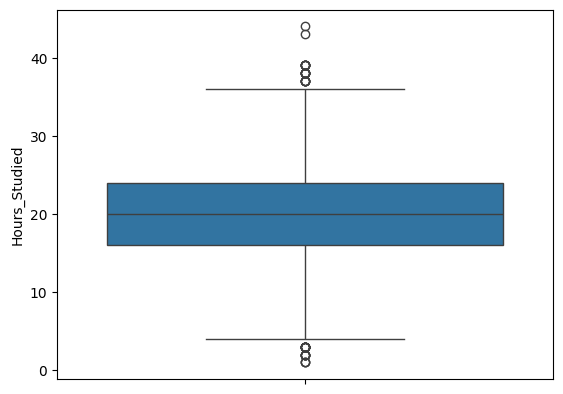

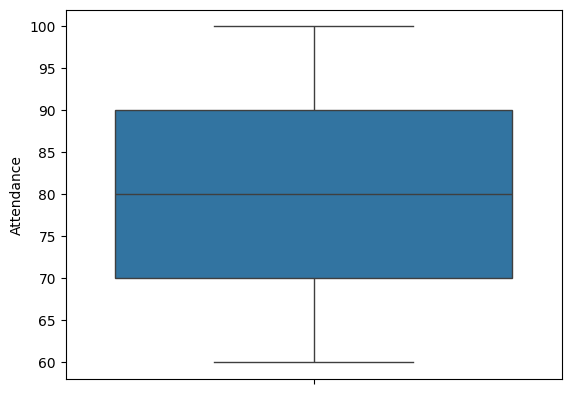

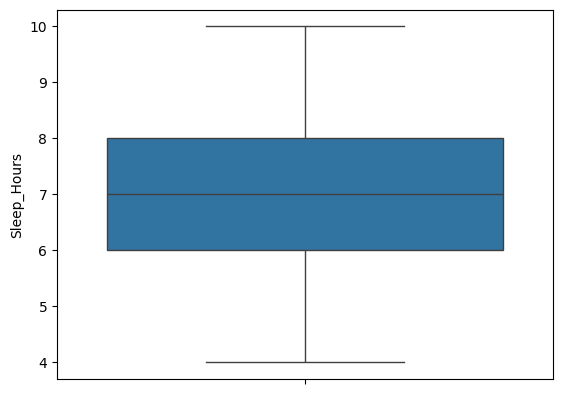

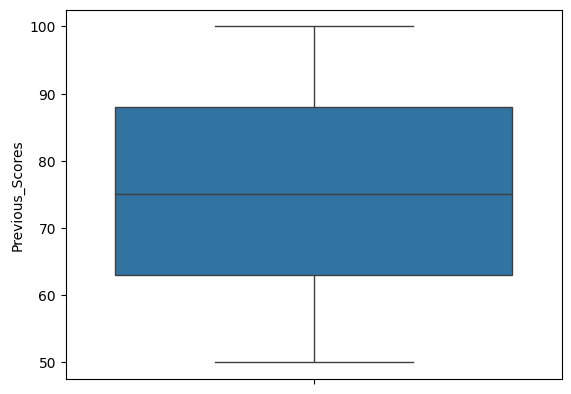

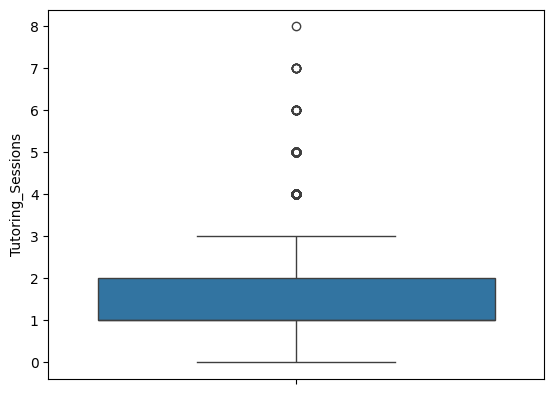

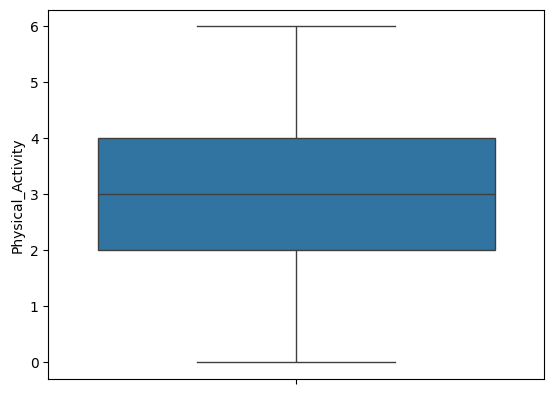

In [17]:
for col in num_columns.columns:
  sns.boxplot(df[col])
  plt.show()

In [18]:
num_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0


In [19]:
cat_columns.head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


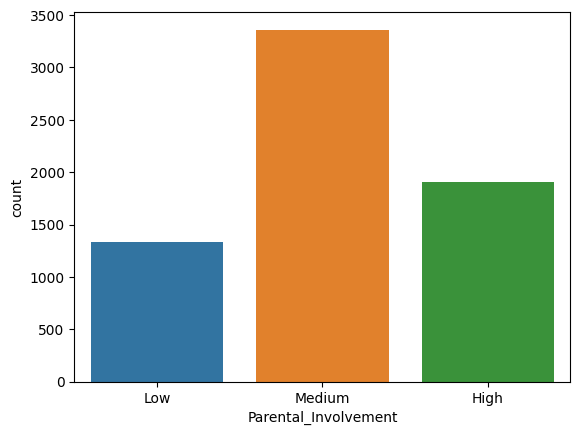

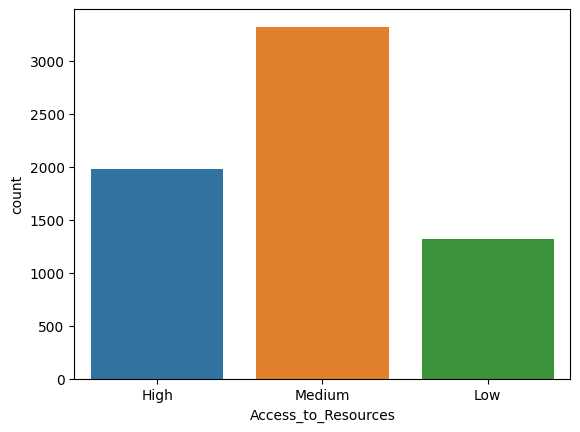

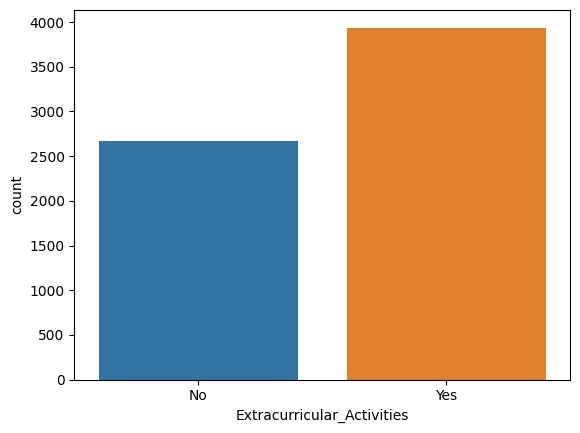

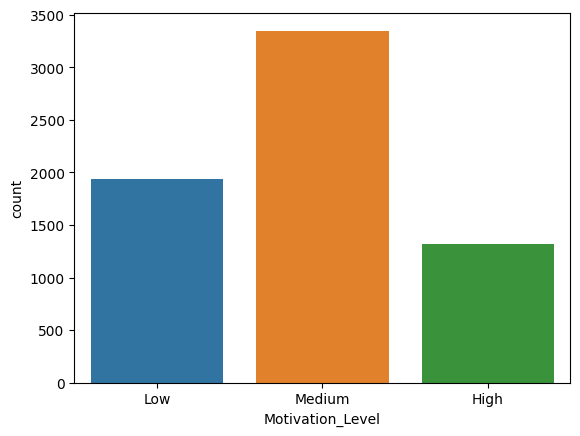

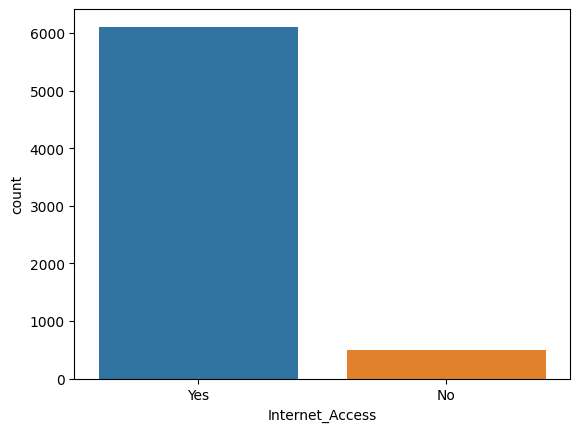

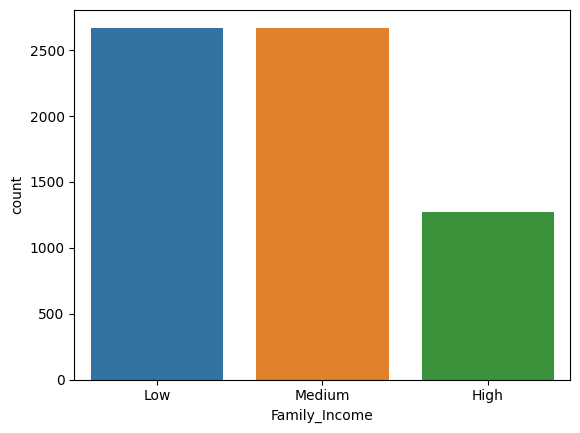

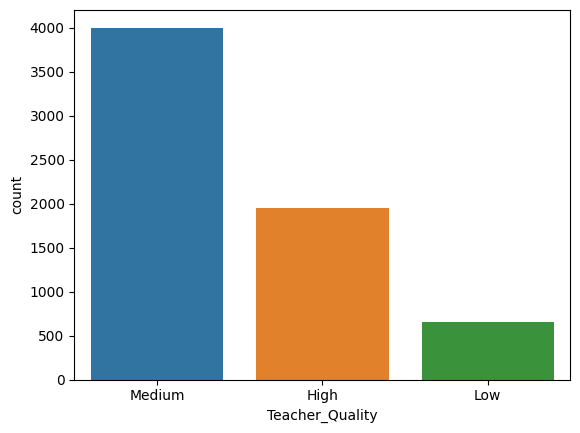

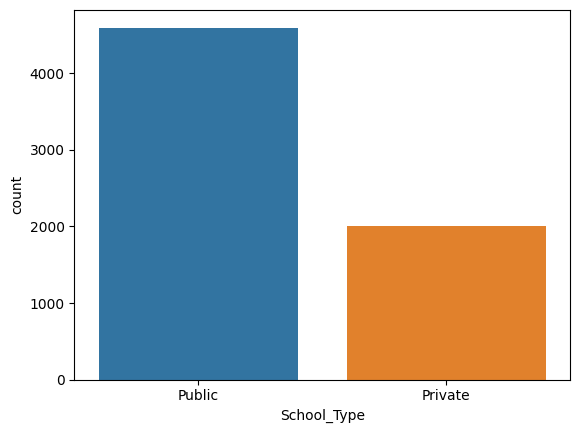

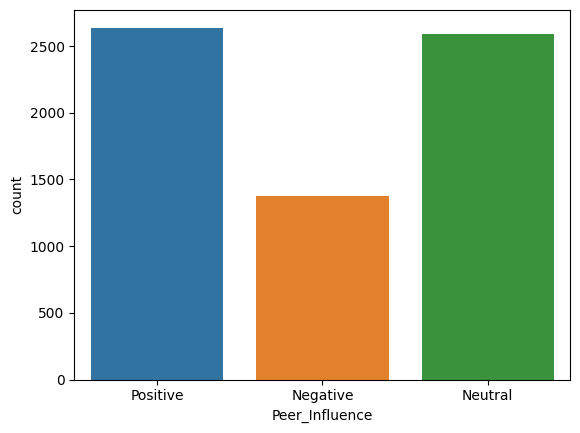

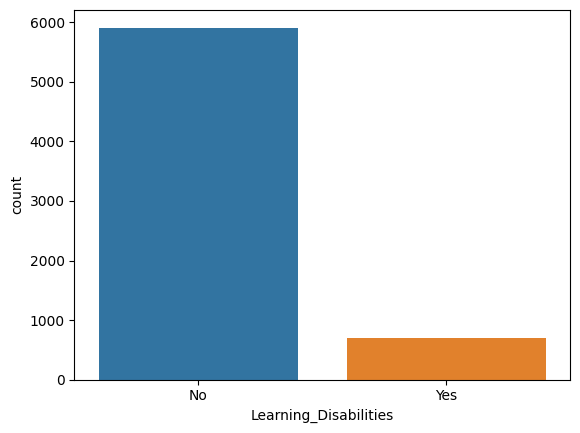

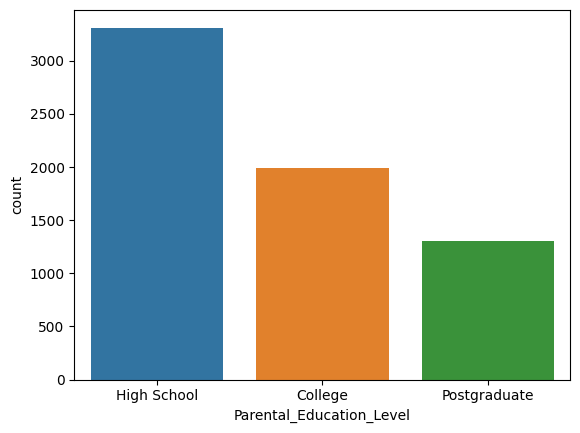

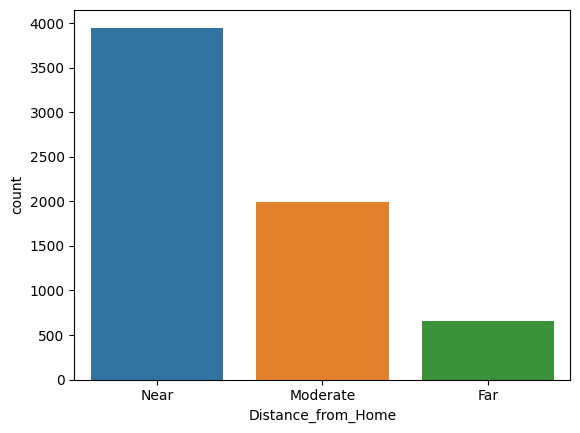

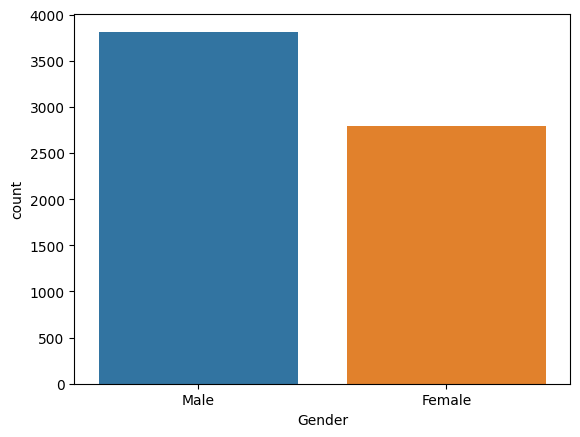

In [20]:
for col in cat_columns.columns:
  sns.countplot(x = col, data = df, hue = col)
  plt.show()

In [21]:
for col in cat_columns.columns:
  print(df[col].value_counts())
  print('\n')

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64


School_Type
Public     4598
Private    2009
Name: count, dtype: int64


Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64


Parental_Education_Level
High School     3313
College         1989
Postgraduate    1305
Name: count, dtype: int64


Distance_from_Home
Near        3951
Moderate

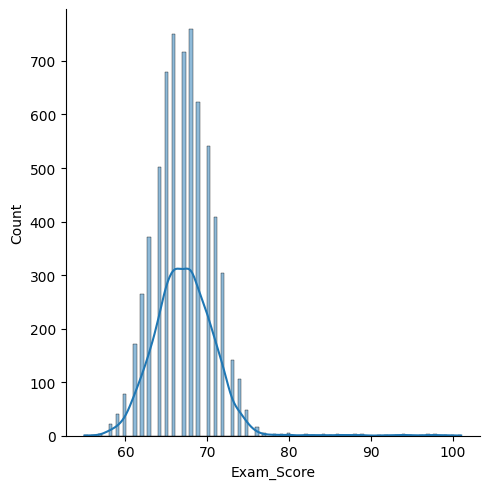

In [22]:
sns.displot(df['Exam_Score'], kde = True)
plt.show()

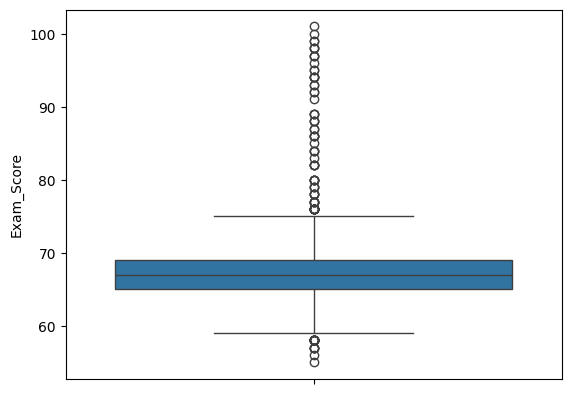

In [23]:
sns.boxplot(df['Exam_Score'])
plt.show()

In [24]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


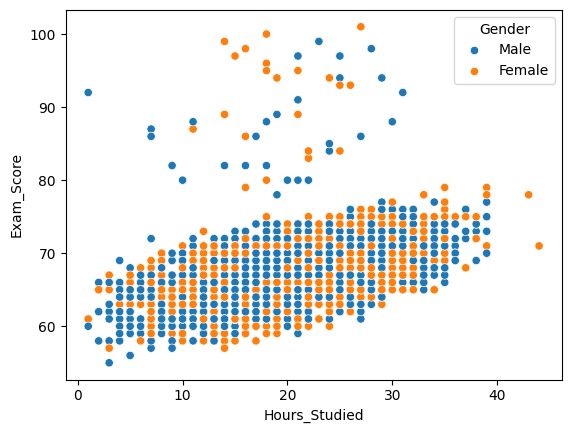

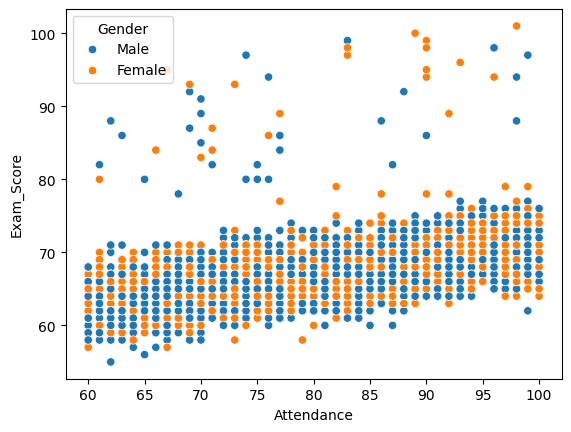

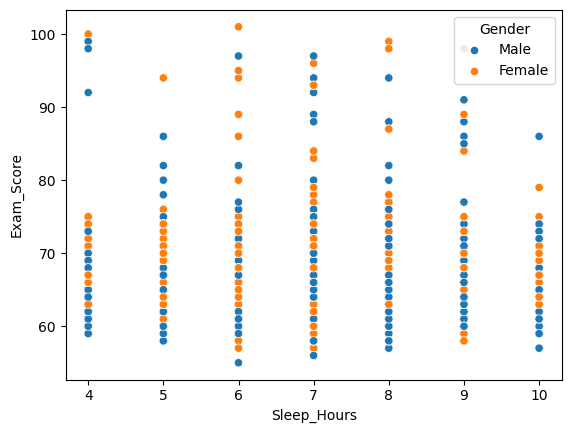

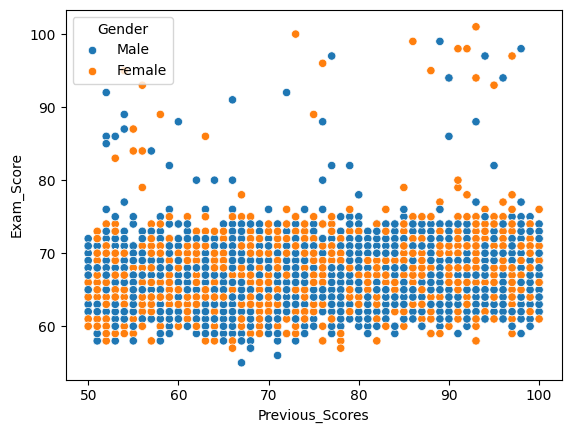

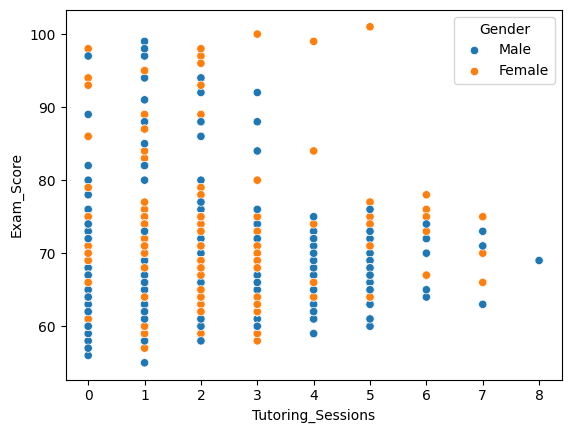

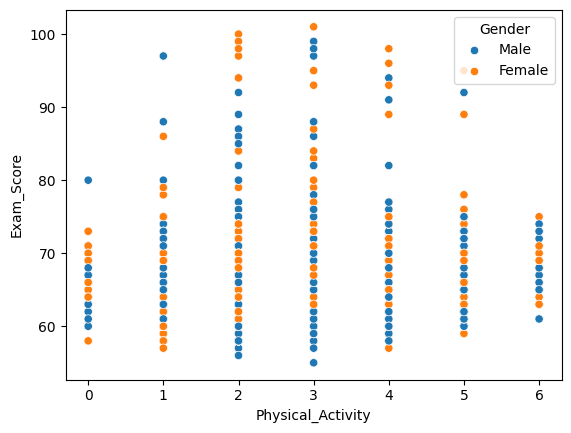

In [25]:
for col in num_columns.columns:
  sns.scatterplot(x = col, y = 'Exam_Score', data = df, hue = 'Gender')
  plt.show()

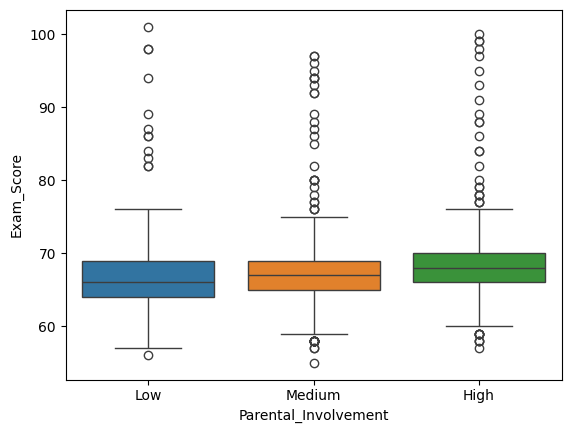

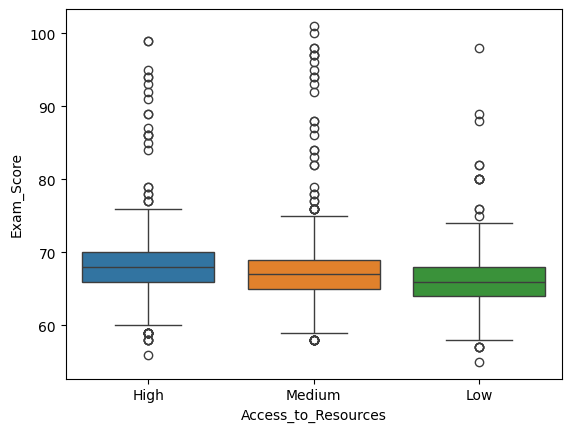

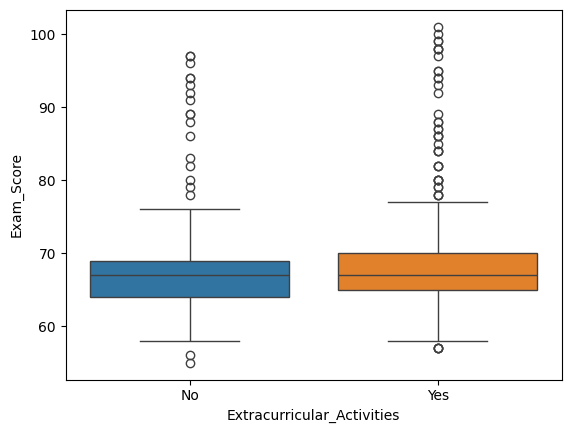

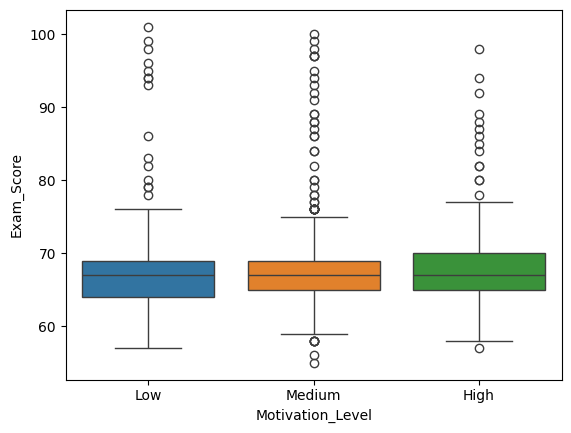

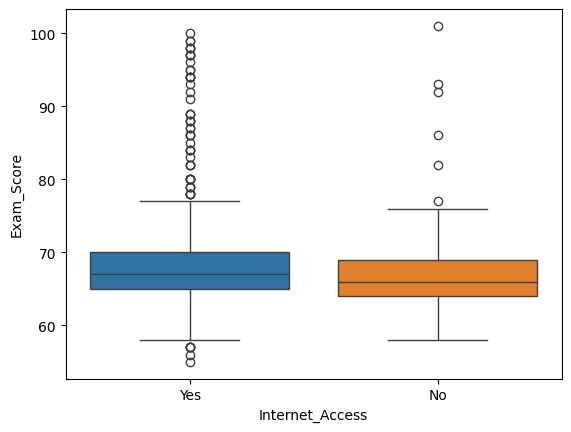

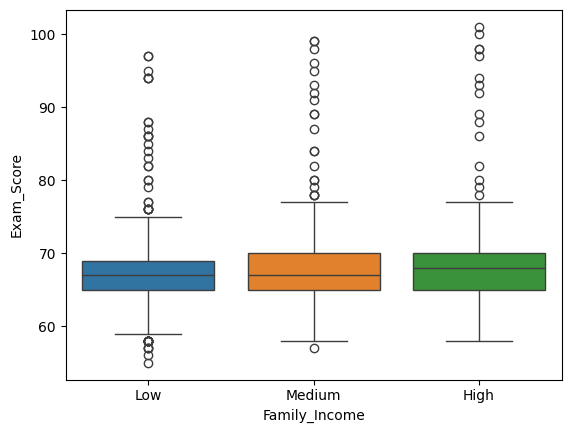

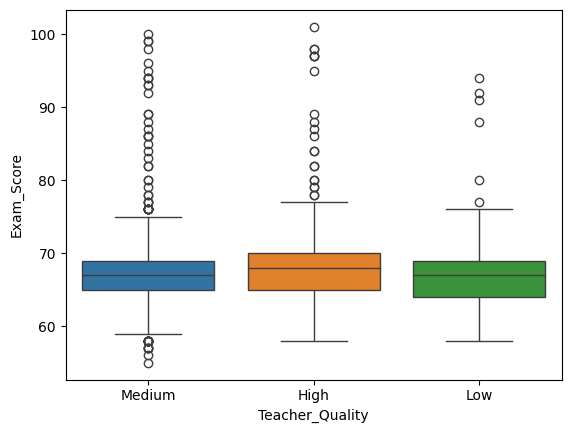

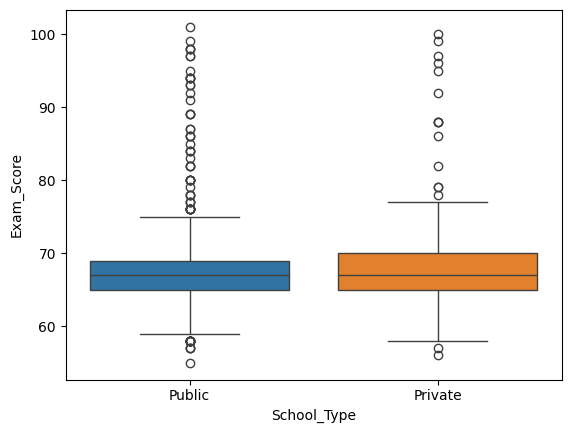

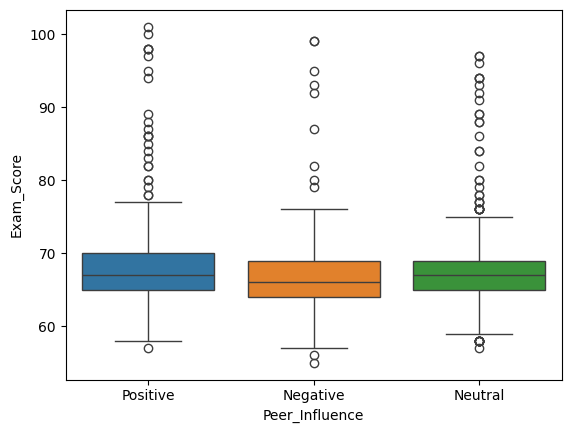

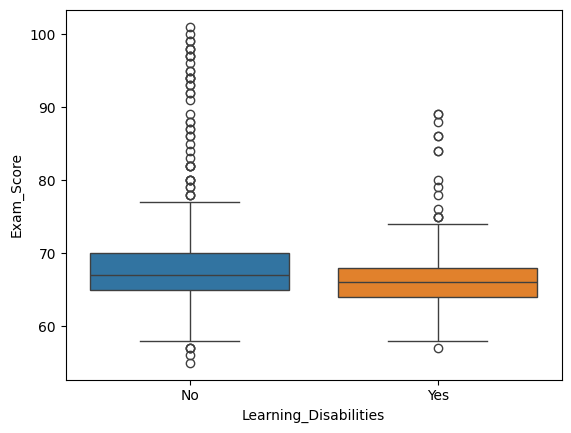

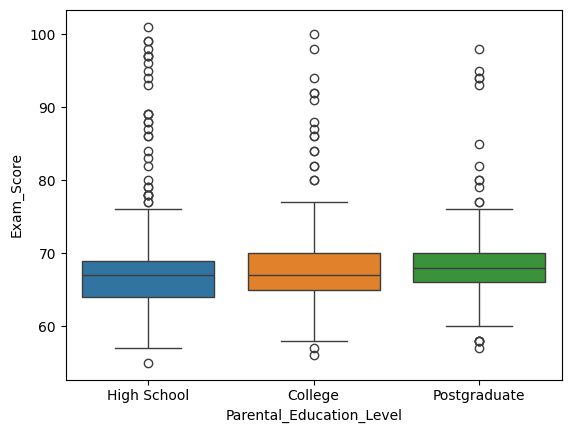

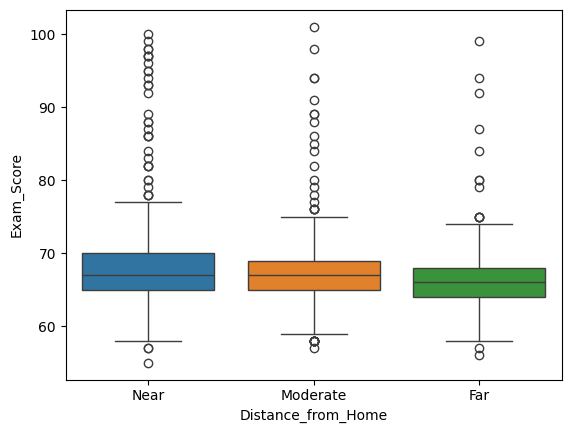

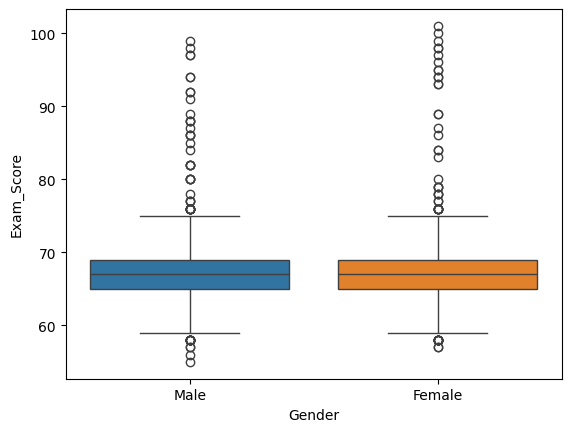

In [26]:
for col in cat_columns.columns:
  sns.boxplot(x = col, y = 'Exam_Score', data = df, hue = col)
  plt.show()

In [27]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [28]:
df.groupby('Gender')['Exam_Score'].mean()

,Exam_Score
Gender,
Female,67.244898
Male,67.228894


In [29]:
pd.pivot_table(df, index = 'Access_to_Resources', columns = ['Parental_Involvement', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access'],
               values = 'Exam_Score', aggfunc = 'mean', fill_value = 0).T

Access_to_Resources                                                                    High  \
Parental_Involvement Extracurricular_Activities Motivation_Level Internet_Access              
High                 No                         High             No               66.333333   
                                                                 Yes              69.628571   
                                                Low              No               72.666667   
                                                                 Yes              67.893939   
                                                Medium           No               67.111111   
                                                                 Yes              68.627119   
                     Yes                        High             No               68.333333   
                                                                 Yes              69.085106   
                                                Low              No               68.142857   
                                                                 Yes              69.800000   
                                                Medium           No               68.000000   
                                                                 Yes              69.686391   
Low                  No                         High             No               69.750000   
                                                                 Yes              67.000000   
                                                Low              No               62.500000   
                                                                 Yes              65.395349   
                                                Medium           No               67.272727   
                                                                 Yes              67.171053   
                     Yes                        High             No               65.500000   
                                                                 Yes              68.179104   
                                                Low              No               64.200000   
                                                                 Yes              67.306122   
                                                Medium           No               66.071429   
                                                                 Yes              67.168067   
Medium               No                         High             No               68.000000   
                                                                 Yes              68.098765   
                                                Low              No               65.375000   
                                                                 Yes              67.338710   
                                                Medium           No               66.300000   
                                                                 Yes              67.868571   
                     Yes                        High             No               67.700000   
                                                                 Yes              69.594340   
                                                Low              No               66.625000   
                                                                 Yes              67.405405   
                                                Medium           No               66.565217   
                                                                 Yes              68.166667   

Access_to_Resources                                                                     Low  \
Parental_Involvement Extracurricular_Activities Motivation_Level Internet_Access              
High                 No                         High             No                0.000000   
                                                                 Yes              66.464286   
         

In [30]:
pd.pivot_table(df, index = ['Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence'], columns = ['Gender', 'Learning_Disabilities'], values = 'Exam_Score',
               aggfunc = 'mean', fill_value = 0)

Gender                                                       Female  \
Learning_Disabilities                                            No   
Family_Income Teacher_Quality School_Type Peer_Influence              
High          High            Private     Negative        65.000000   
                                          Neutral         67.166667   
                                          Positive        68.000000   
                              Public      Negative        67.000000   
                                          Neutral         68.880000   
                                          Positive        70.048780   
              Low             Private     Negative        71.000000   
                                          Neutral         66.333333   
                                          Positive        67.000000   
                              Public      Negative        66.714286   
                                          Neutral         66.307692   
                                          Positive        67.846154   
              Medium          Private     Negative        67.588235   
                                          Neutral         67.125000   
                                          Positive        69.588235   
                              Public      Negative        67.232558   
                                          Neutral         67.625000   
                                          Positive        68.175258   
Low           High            Private     Negative        65.892857   
                                          Neutral         67.465116   
                                          Positive        67.838710   
                              Public      Negative        66.095238   
                                          Neutral         67.436782   
                                          Positive        67.787234   
              Low             Private     Negative        66.166667   
                                          Neutral         66.333333   
                                          Positive        68.076923   
                              Public      Negative        67.000000   
                                          Neutral         65.965517   
                                          Positive        66.766667   
              Medium          Private     Negative        66.432432   
                                          Neutral         67.177215   
                                          Positive        67.631579   
                              Public      Negative        66.237624   
                                          Neutral         67.244444   
                                          Positive        66.721854   
Medium        High            Private     Negative        68.800000   
                                          Neutral         67.947368   
                                          Positive        67.575000   
                              Public      Negative        67.529412   
                                          Neutral         67.901408   
                                          Positive        68.682927   
              Low             Private     Negative        67.250000   
                                          Neutral         67.076923   
                                          Positive        66.000000   
                              Public      Negative        65.400000   
                                          Neutral         66.380952   
                                          Positive        68.000000   
              Medium          Private     Negative        68.076923   
                                          Neutral         68.000000   
                                          Positive        67.098592   
                              Public      Negative        66.809524   
                                          Neutral         66.709497   
                        

In [31]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [32]:
cat_cols = df.select_dtypes(exclude = ['int', 'float']).columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [33]:
df = pd.get_dummies(df, columns = cat_cols, dtype = int)
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,19,64,8,59,2,4,61,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,24,98,7,91,2,4,74,0,0,1,...,1,0,0,0,1,0,0,1,0,1
3,29,89,8,98,1,4,71,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,19,92,6,65,3,4,70,0,0,1,...,1,0,1,0,0,0,0,1,1,0


In [34]:
pd.set_option("display.max_columns", None)

In [35]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_No,Internet_Access_Yes,Family_Income_High,Family_Income_Low,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Private,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1
1,19,64,8,59,2,4,61,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
2,24,98,7,91,2,4,74,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
3,29,89,8,98,1,4,71,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
4,19,92,6,65,3,4,70,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0


In [36]:
num_columns.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

In [37]:
from sklearn.feature_selection import mutual_info_regression

X = df.drop(columns = ['Exam_Score'], axis = 1)
y = df['Exam_Score']

mutual_info = mutual_info_regression(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

,0
Attendance,0.329510
Hours_Studied,0.176562
Parental_Involvement_High,0.020813
Previous_Scores,0.019095
Tutoring_Sessions,0.014504
Learning_Disabilities_No,0.014087
Teacher_Quality_Low,0.013393
Parental_Involvement_Low,0.010988
Peer_Influence_Negative,0.010829
Access_to_Resources_Low,0.010801


In [38]:
selected_features = mutual_info[mutual_info > 0].index.tolist()
X_selected = X[selected_features]

In [40]:
X.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_High',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_High', 'Access_to_Resources_Low',
       'Access_to_Resources_Medium', 'Extracurricular_Activities_No',
       'Extracurricular_Activities_Yes', 'Motivation_Level_High',
       'Motivation_Level_Low', 'Motivation_Level_Medium', 'Internet_Access_No',
       'Internet_Access_Yes', 'Family_Income_High', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_High', 'Teacher_Quality_Low',
       'Teacher_Quality_Medium', 'School_Type_Private', 'School_Type_Public',
       'Peer_Influence_Negative', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_No',
       'Learning_Disabilities_Yes', 'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Pos

In [41]:
X_selected.columns

Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Motivation_Level_Medium',
       'Family_Income_High', 'Teacher_Quality_High', 'Teacher_Quality_Low',
       'School_Type_Public', 'Peer_Influence_Negative',
       'Peer_Influence_Neutral', 'Learning_Disabilities_No',
       'Learning_Disabilities_Yes', 'Parental_Education_Level_College',
       'Parental_Education_Level_High School', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [42]:
X_selected.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Medium,Family_Income_High,Teacher_Quality_High,Teacher_Quality_Low,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Gender_Female,Gender_Male
0,23,84,73,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
1,19,64,59,2,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0
2,24,98,91,2,0,0,1,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1
3,29,89,98,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1
4,19,92,65,3,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0


In [48]:
num_columns = ['Hours_Studied',	'Attendance',	'Previous_Scores',	'Tutoring_Sessions']

In [43]:
y.head()

,Exam_Score
0,67
1,61
2,74
3,71
4,70


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [50]:
X_train.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Medium,Family_Income_High,Teacher_Quality_High,Teacher_Quality_Low,School_Type_Public,Peer_Influence_Negative,Peer_Influence_Neutral,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Gender_Female,Gender_Male
5810,1.173579,-0.075846,-0.837277,0.405784,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0
1268,-0.661983,0.531894,1.314728,0.405784,1,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,1,1,0
414,0.339232,0.618714,0.551113,-0.405017,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1
4745,-0.328245,1.747376,0.759372,-0.405017,1,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,1
654,2.508533,-0.162667,1.661825,-0.405017,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Linear Regression:")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

Linear Regression:
RMSE:  1.9150326638866346
R2 Score:  0.7405496073158853


In [53]:
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Decision Tree:")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

Decision Tree:
RMSE:  3.1614403351060893
R2 Score:  0.29291448547663423


In [54]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Random Forest:")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

Random Forest:
RMSE:  2.2146883136860613
R2 Score:  0.6530018267591335


In [55]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Support Vector Regressor:")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

Support Vector Regressor:
RMSE:  1.9371073264779841
R2 Score:  0.7345337421192946


In [56]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("K Nearest Neighbors:")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

K Nearest Neighbors:
RMSE:  2.3511995200441786
R2 Score:  0.6089062016771618


In [57]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Gradient Boosting Regressor:")
print("RMSE: ", rmse)
print("R2 Score: ", r2)

Gradient Boosting Regressor:
RMSE:  1.9759737891080944
R2 Score:  0.7237741495358518
